In [1]:
import scipy.io
import numpy as np
import sys
sys.path.append("..")
from utils import load_files, get_rdms, get_rdm, mean_vit, mean_bert, mean_gpt
import matplotlib.pyplot as plt
import seaborn as sns
import torch
%load_ext autoreload
%autoreload 2

In [2]:
def plot_rdms(axs, data):
    for i, x in enumerate(zip(data.keys(), data.values(), axs.flat)):
        k = x[0]
        v = x[1]
        ax = x[2]
        sns.heatmap(v, ax=ax, cmap='plasma')
        ax.set_title(k, fontsize=30, fontweight='bold')

In [3]:
bert_feats = load_files("bert_feats")
bert_feats = bert_feats.reshape(12, 81, int(62208/81))
mean_bert_layers_txt = mean_bert(bert_feats, 1, "Text")
sbert_txt_rdms = get_rdms(mean_bert_layers_txt)

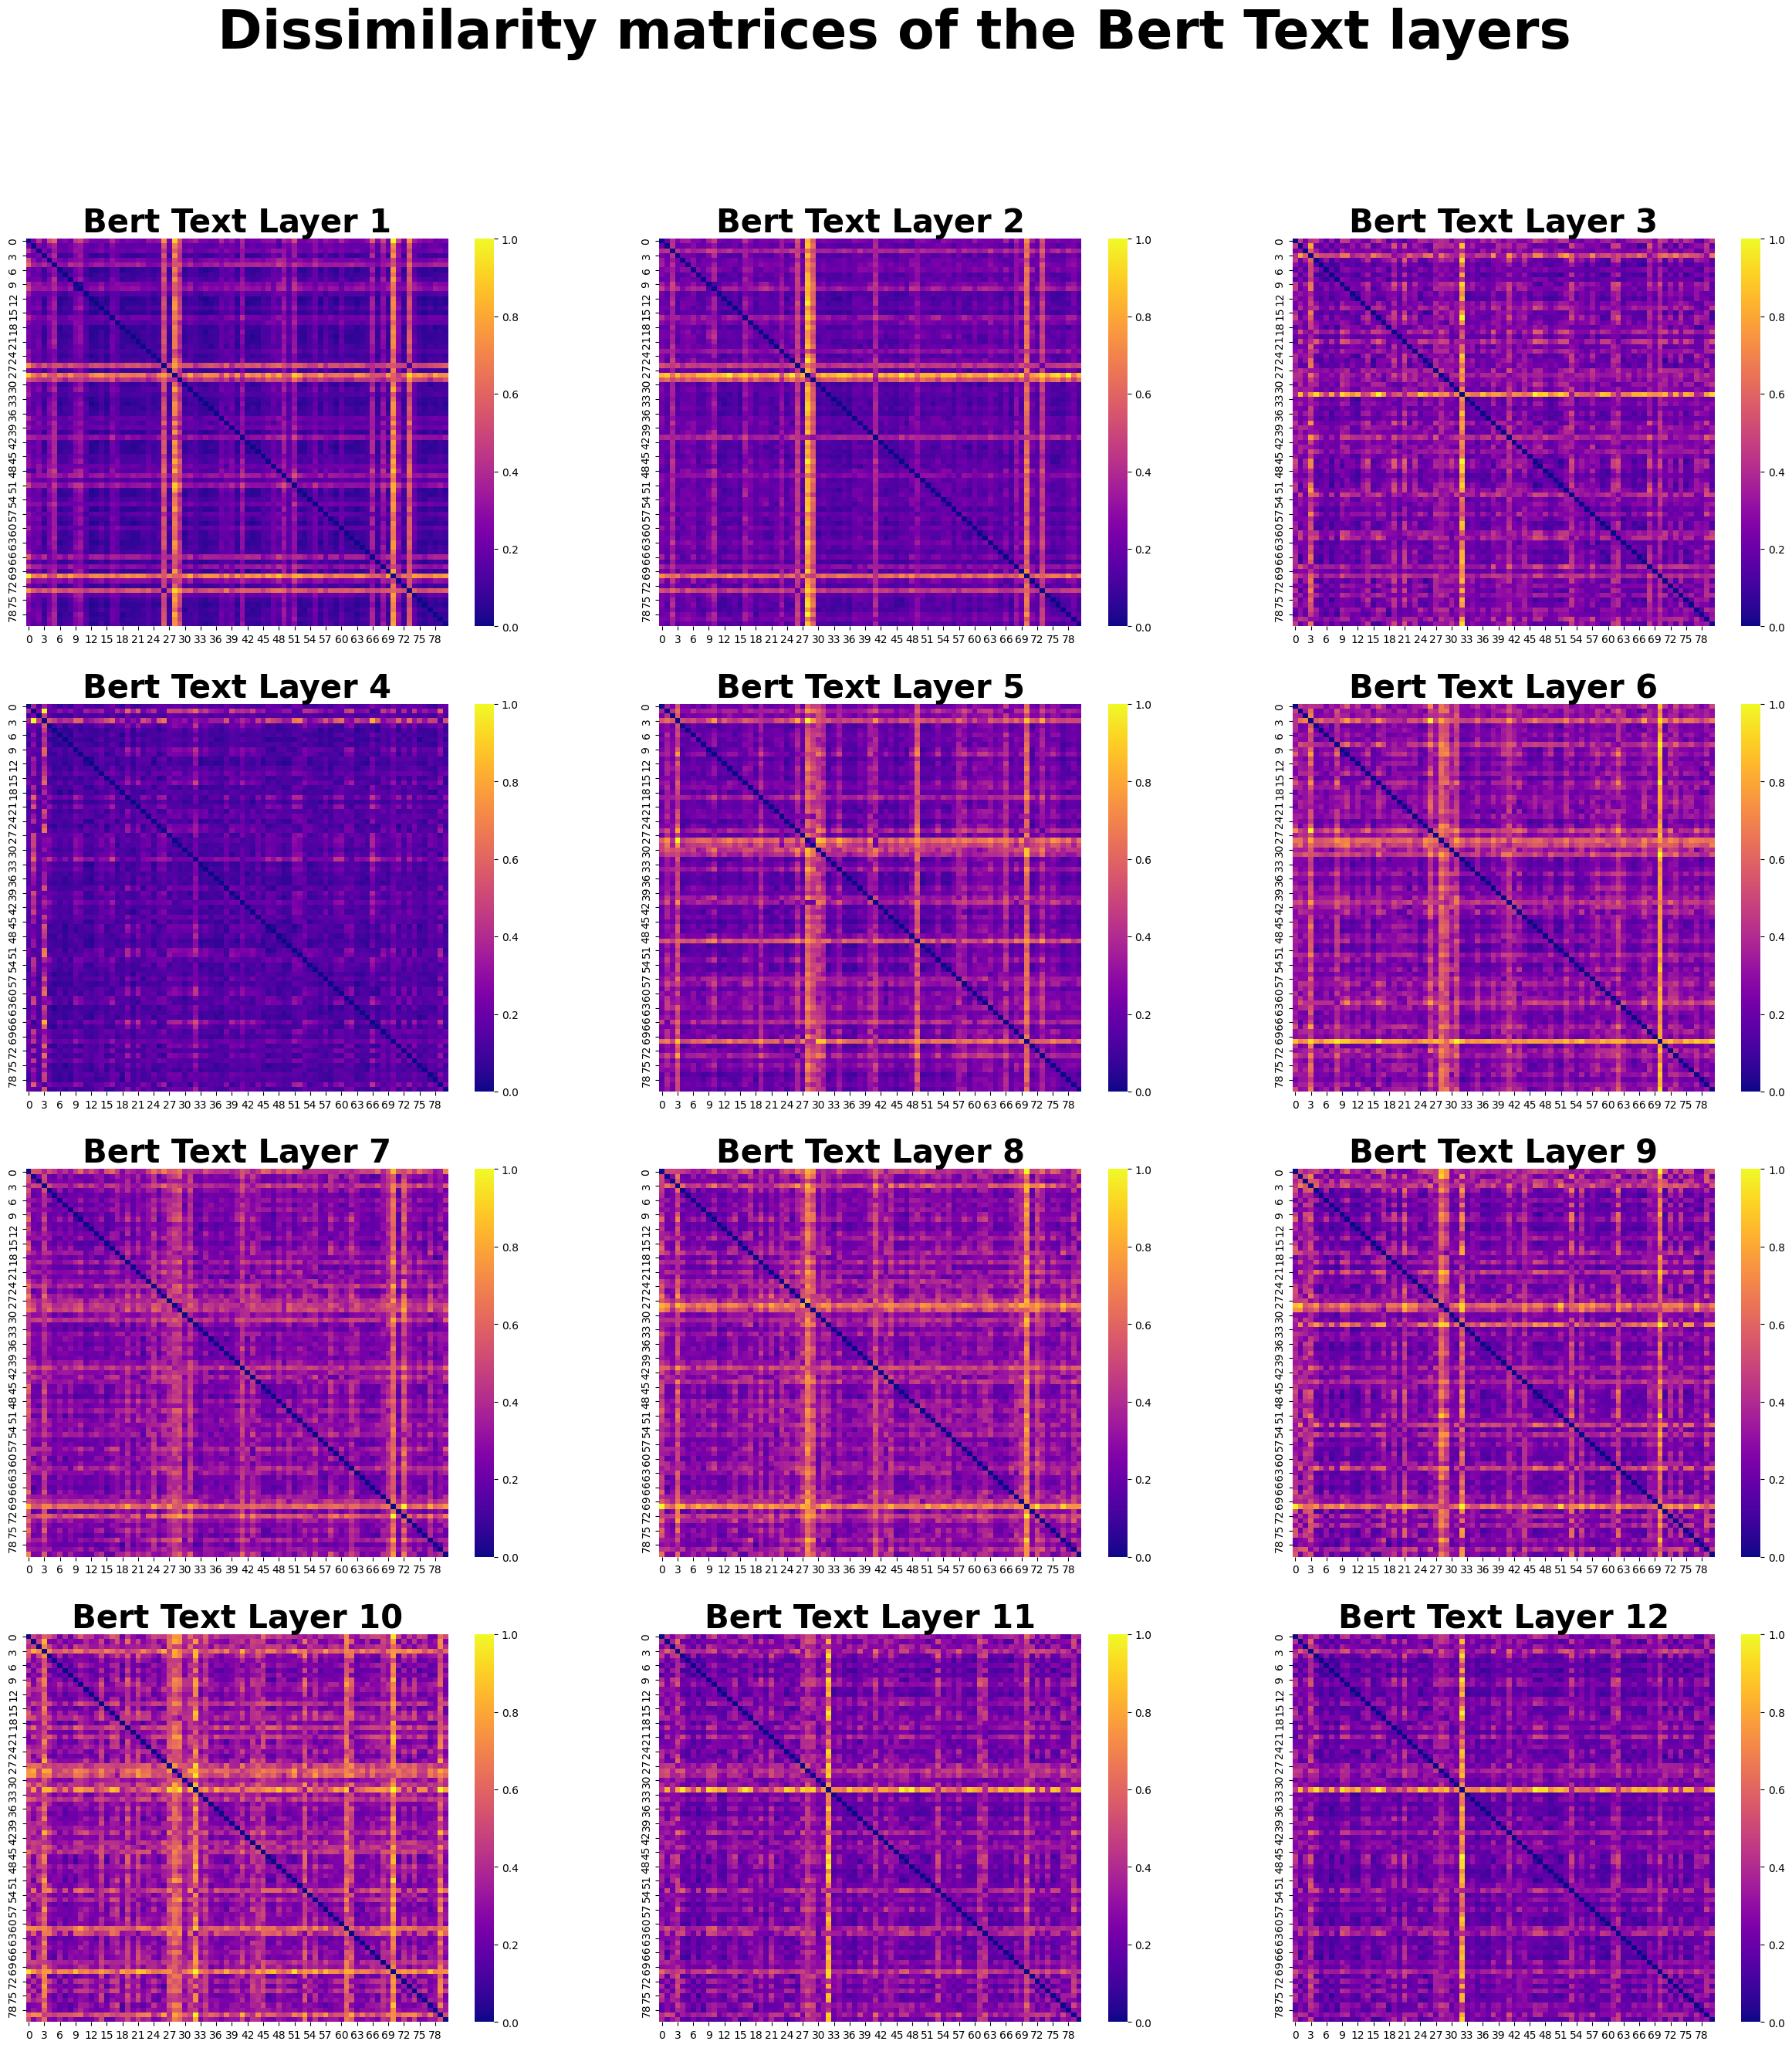

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the Bert Text layers', fontsize=50, fontweight='bold')


plot_rdms(axs, sbert_txt_rdms)

In [5]:
vit = load_files("vit_feats")
vit = vit.reshape(12, 810, int(622080/810))
mean_vit_layers = mean_vit(vit)
svit_rdms = get_rdms(mean_vit_layers)

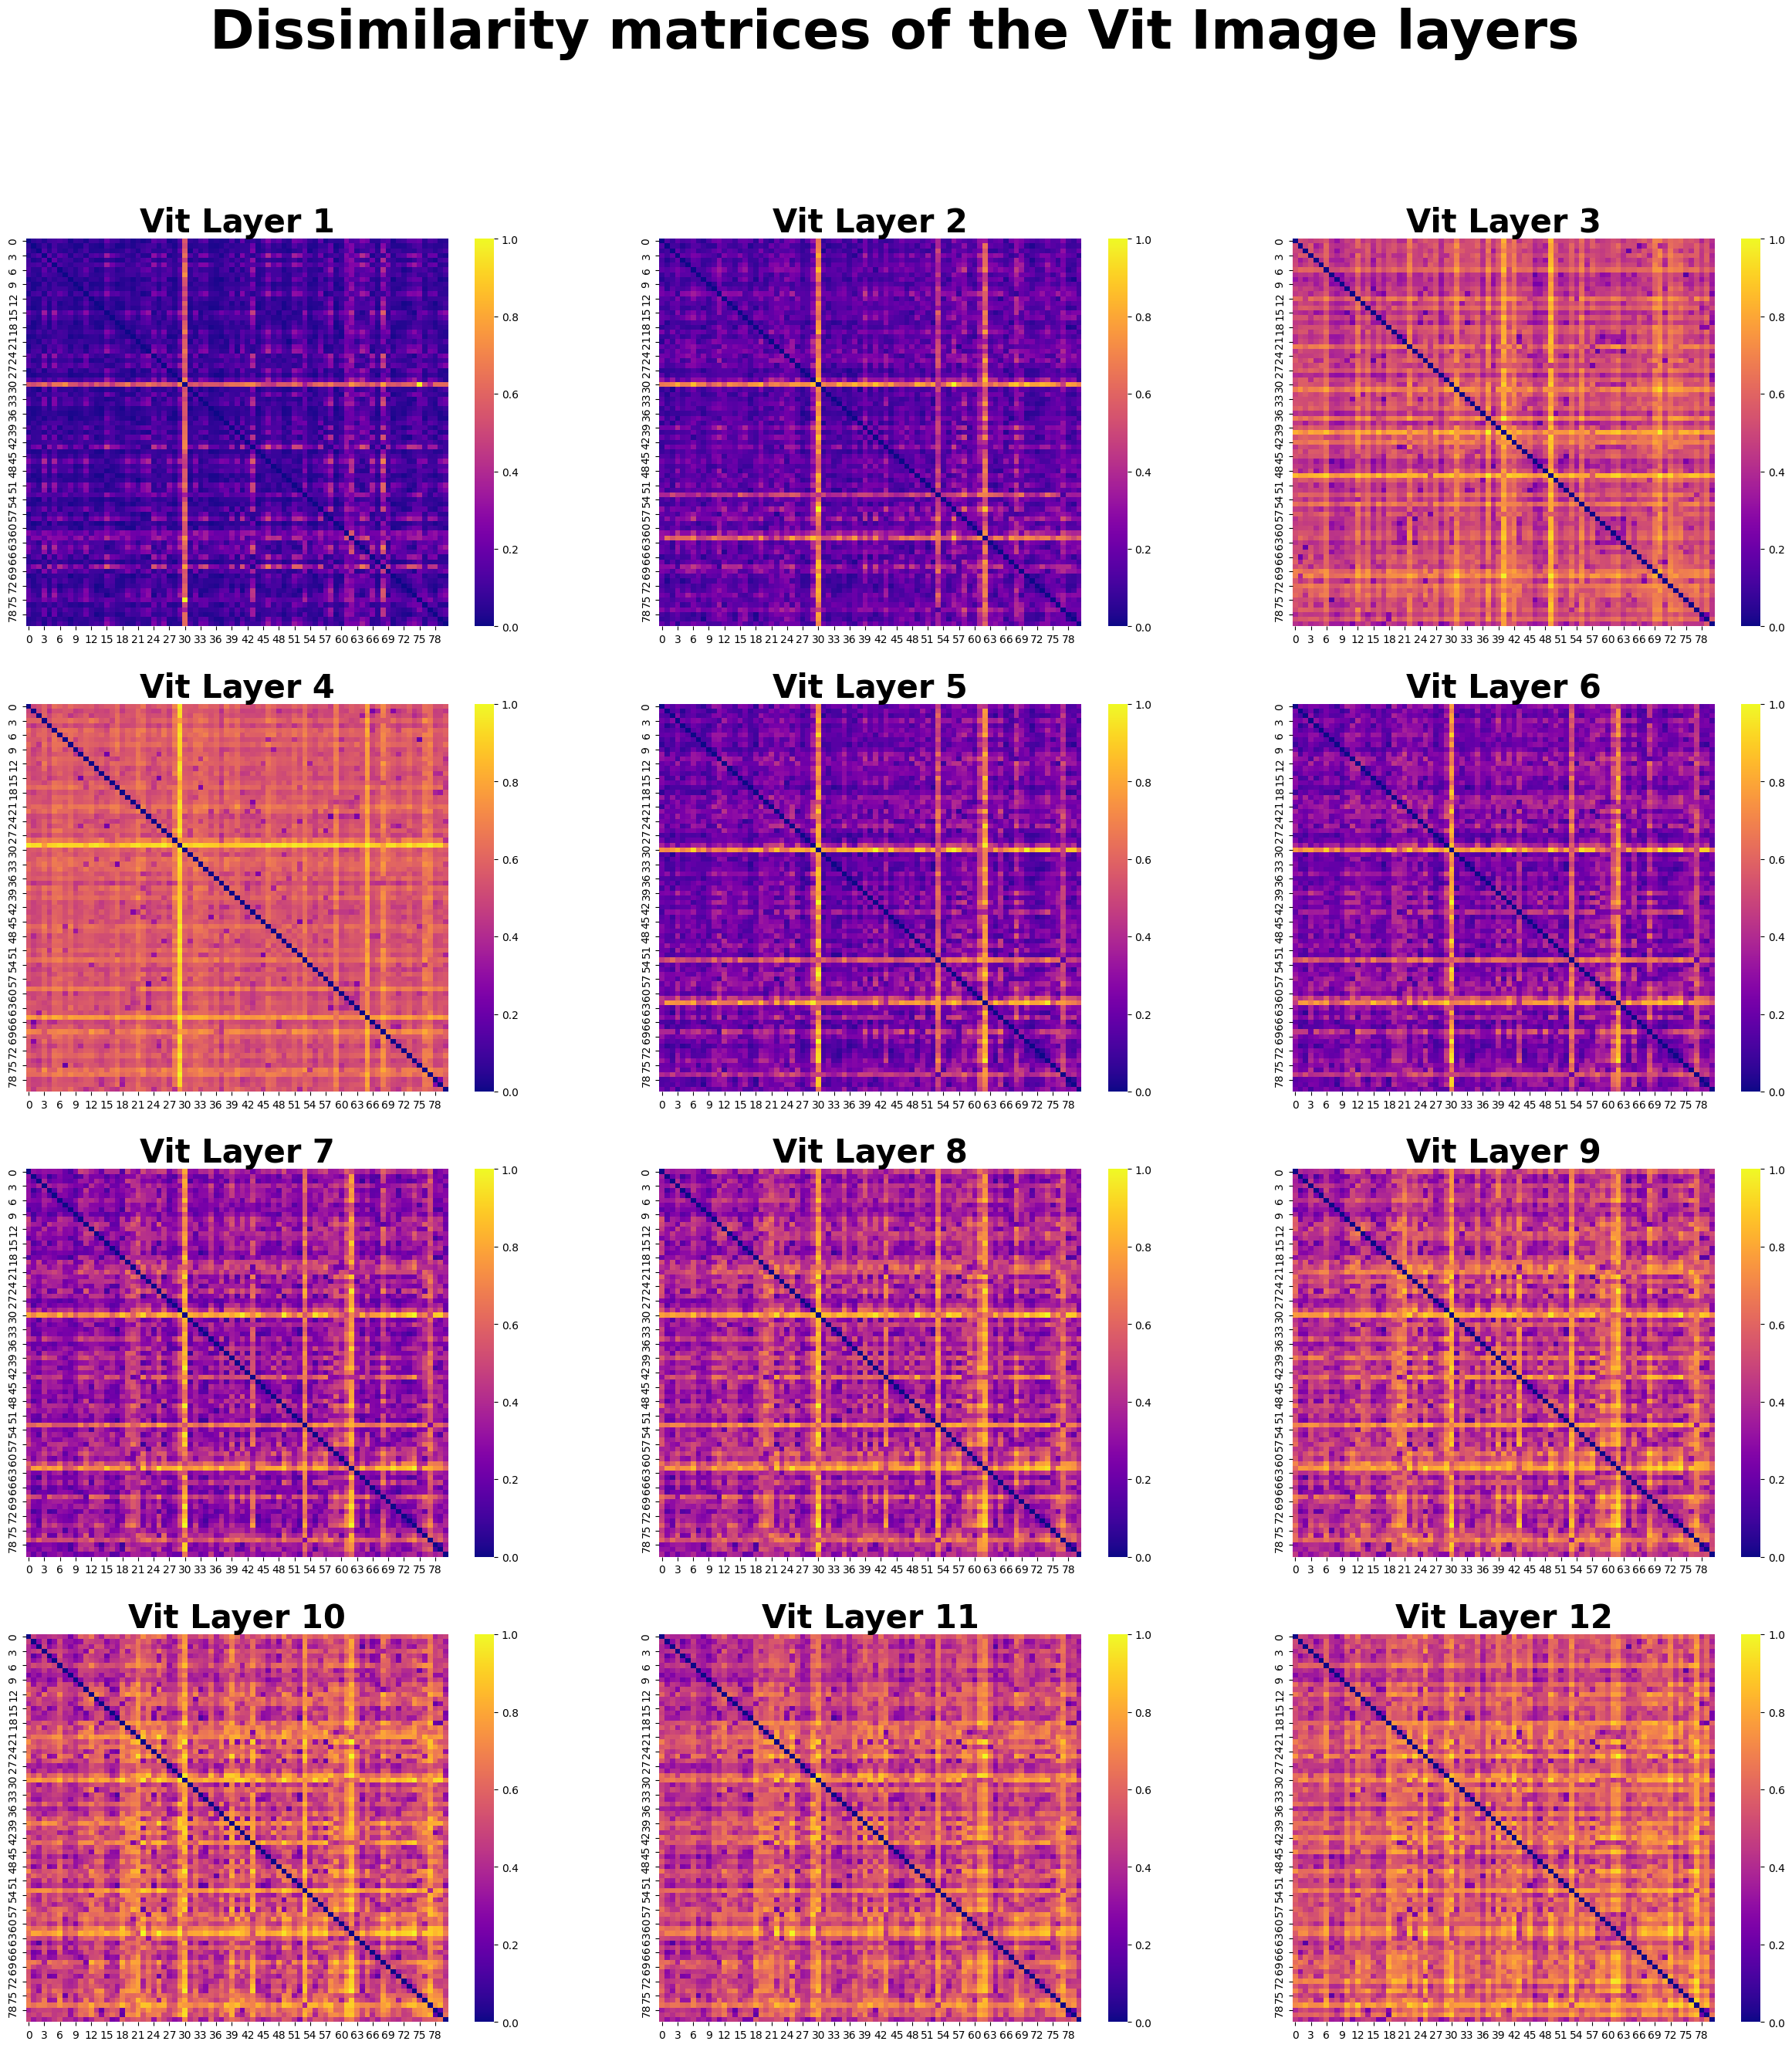

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the Vit Image layers', fontsize=50, fontweight='bold')


plot_rdms(axs, svit_rdms)

In [7]:
gpt_feats = load_files("gpt_feats")
gpt_feats = gpt_feats.reshape(12, 81, int(62208/81))
mean_gpt_layers_txt = mean_gpt(gpt_feats, 1, "Text")
sgpt_rdms = get_rdms(mean_gpt_layers_txt)

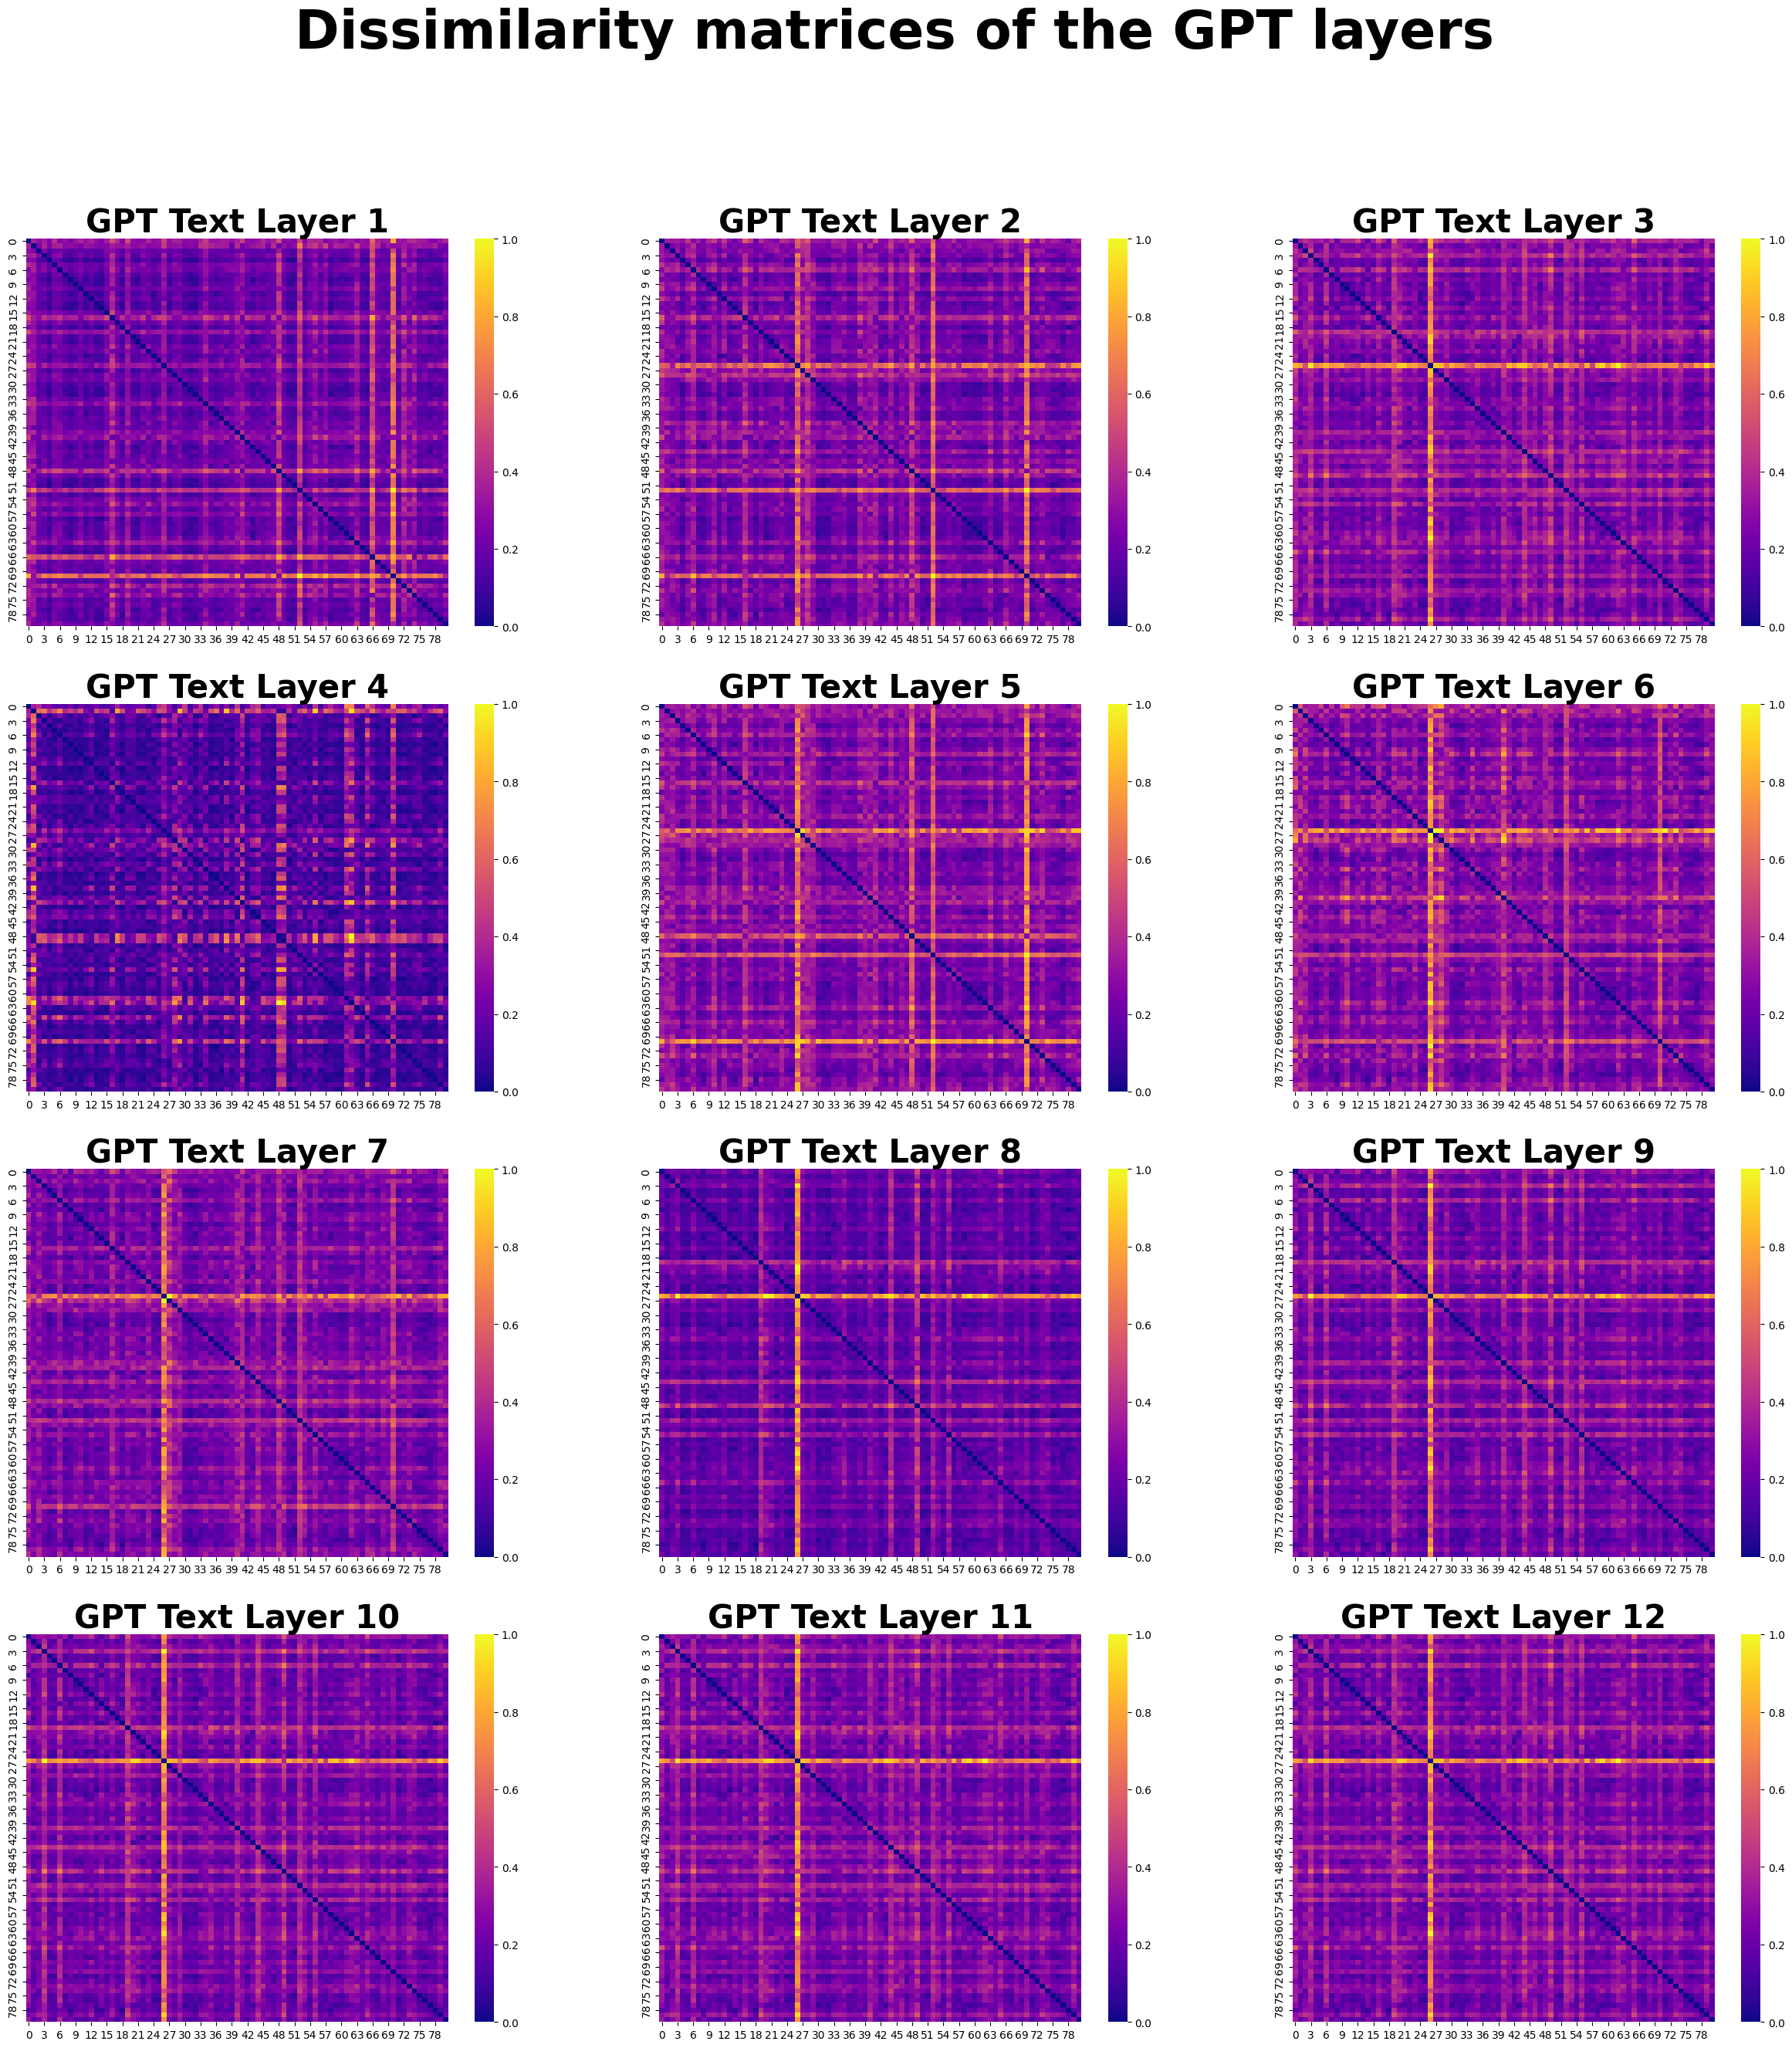

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
fig.suptitle('Dissimilarity matrices of the GPT layers', fontsize=50, fontweight='bold')


plot_rdms(axs, sgpt_rdms)

In [9]:
%store sgpt_rdms
%store svit_rdms
%store sbert_txt_rdms

Stored 'sgpt_rdms' (dict)
Stored 'svit_rdms' (dict)
Stored 'sbert_txt_rdms' (dict)


In [10]:
%store gpt_feats
%store vit
%store bert_feats

Stored 'gpt_feats' (Tensor)
Stored 'vit' (Tensor)
Stored 'bert_feats' (Tensor)
